# Task
Perform sentiment analysis on the text data in the Sentiment_dataset.csv file, including data preprocessing, sentiment classification (positive, negative, neutral), visualization of sentiment distribution, generation of word clouds for each sentiment category, and a summary of the findings.

## Load Dataset

Load the provided CSV file '/content/3) Sentiment_dataset.csv' into a pandas DataFrame. Inspect the first few rows and column names to understand its structure, and identify the column containing the text data for analysis.


First, I'll import the pandas library, then load the specified CSV file into a DataFrame, display its first 5 rows, and print the column names to fulfill the subtask requirements.



In [1]:
import pandas as pd

df = pd.read_csv('/content/3) Sentiment_dataset.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nColumn names of the DataFrame:")
print(df.columns.tolist())

First 5 rows of the DataFrame:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                    

## Text Preprocessing

Preprocess the text data by performing tokenization, removing stopwords, and applying stemming or lemmatization. This step will clean and normalize the text for better sentiment analysis.

The first instruction is to install the `nltk` library if it's not already installed. This is a common first step for text processing tasks in Python. I will then download the required NLTK data (punkt, stopwords, wordnet) in the same code block to ensure all necessary resources are available before defining the preprocessing function.

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print("NLTK data 'punkt', 'stopwords', and 'wordnet' downloaded successfully.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK data 'punkt', 'stopwords', and 'wordnet' downloaded successfully.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...



Now that the necessary NLTK data has been downloaded, I will import the required modules, define a text preprocessing function that handles lowercasing, punctuation removal, tokenization, stopword removal, and lemmatization, and then apply this function to the 'Text' column of the DataFrame to create a new 'Processed_Text' column.



In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

print("NLTK data 'punkt', 'stopwords', 'wordnet', and 'punkt_tab' downloaded successfully.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


NLTK data 'punkt', 'stopwords', 'wordnet', and 'punkt_tab' downloaded successfully.


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Now that the necessary NLTK data, including 'punkt_tab', has been successfully downloaded, I will re-execute the text preprocessing function to clean the 'Text' column and create a 'Processed_Text' column.



In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join the processed words back into a string
    return ' '.join(processed_tokens)

# Apply the preprocessing function to the 'Text' column
df['Processed_Text'] = df['Text'].apply(preprocess_text)

print("Text preprocessing complete. A new 'Processed_Text' column has been added to the DataFrame.")
print("First 5 rows with 'Text' and 'Processed_Text' columns:")
print(df[['Text', 'Processed_Text']].head())

Text preprocessing complete. A new 'Processed_Text' column has been added to the DataFrame.
First 5 rows with 'Text' and 'Processed_Text' columns:
                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                     Processed_Text  
0       enjoying beautiful day park  
1          traffic terrible morning  
2          finished amazing workout  
3  excited upcoming weekend getaway  
4  trying new recipe dinner tonight  


## Perform Sentiment Analysis

Utilize a library like NLTK (VADER) or TextBlob to perform sentiment analysis on the preprocessed text. Classify each text entry as positive, negative, or neutral, and store these sentiment labels in a new column within the DataFrame.



The first instruction is to download the 'vader_lexicon' from NLTK. This is a prerequisite for using NLTK's VADER sentiment intensity analyzer.

In [6]:
import nltk
nltk.download('vader_lexicon')

print("NLTK data 'vader_lexicon' downloaded successfully.")

NLTK data 'vader_lexicon' downloaded successfully.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Now that the 'vader_lexicon' has been successfully downloaded, I will proceed to import the `SentimentIntensityAnalyzer`, initialize it, define a function to classify sentiments based on VADER's compound score, and then apply this function to the 'Processed_Text' column to create the 'Predicted_Sentiment' column as per the subtask instructions.


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 'Neutral' # Handle empty or non-string text
    score = sia.polarity_scores(text)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the 'Processed_Text' column
df['Predicted_Sentiment'] = df['Processed_Text'].apply(get_sentiment)

print("Sentiment analysis complete. A new 'Predicted_Sentiment' column has been added to the DataFrame.")
print("First 5 rows with 'Text', 'Processed_Text', 'Sentiment', and 'Predicted_Sentiment' columns:")
print(df[['Text', 'Processed_Text', 'Sentiment', 'Predicted_Sentiment']].head())

Sentiment analysis complete. A new 'Predicted_Sentiment' column has been added to the DataFrame.
First 5 rows with 'Text', 'Processed_Text', 'Sentiment', and 'Predicted_Sentiment' columns:
                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                     Processed_Text    Sentiment Predicted_Sentiment  
0       enjoying beautiful day park   Positive              Positive  
1          traffic terrible morning   Negative              Negative  
2          finished amazing workout   Positive              Positive  
3  excited upcoming weekend getaway   Positive              Positive  
4  trying new recipe dinner tonight   Neutral                Neutral  


## Visualize Sentiment Distribution

Create a bar chart or a pie chart to visualize the distribution of positive, negative, and neutral sentiments across the dataset. Ensure the plot includes appropriate labels and a legend.



To visualize the sentiment distribution as requested, I will import `matplotlib.pyplot`, calculate the counts for each sentiment category in the 'Predicted_Sentiment' column, and then generate a bar chart with appropriate labels and a title.



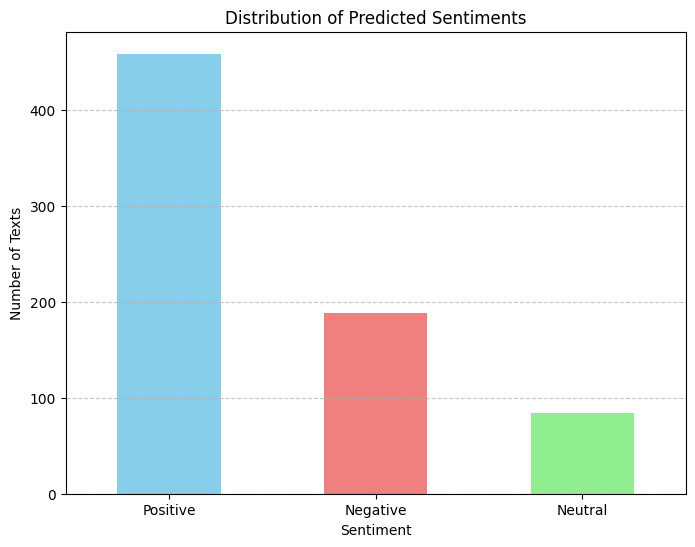

Bar chart showing the distribution of predicted sentiments has been generated.


In [8]:
import matplotlib.pyplot as plt

# Calculate the distribution of predicted sentiments
sentiment_distribution = df['Predicted_Sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Texts')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Bar chart showing the distribution of predicted sentiments has been generated.")

## Generate Word Clouds
Generate separate word clouds for words associated with positive, negative, and neutral sentiments to visualize the most frequent terms in each category. Ensure each word cloud is clearly labeled.



The instruction is to install the `wordcloud` library if it's not already installed. This is a necessary prerequisite for generating word clouds.



In [9]:
pip install wordcloud

print("wordcloud library installed successfully.")

SyntaxError: invalid syntax (ipython-input-2582722812.py, line 1)

In [10]:
get_ipython().system('pip install wordcloud')

print("wordcloud library installed successfully.")

wordcloud library installed successfully.


Now that the `wordcloud` library is confirmed to be installed, I will proceed with generating separate word clouds for positive, negative, and neutral sentiments as per the subtask instructions. This involves importing necessary libraries, filtering the DataFrame by sentiment, combining the processed text for each sentiment, generating the word clouds, and then displaying them in subplots.



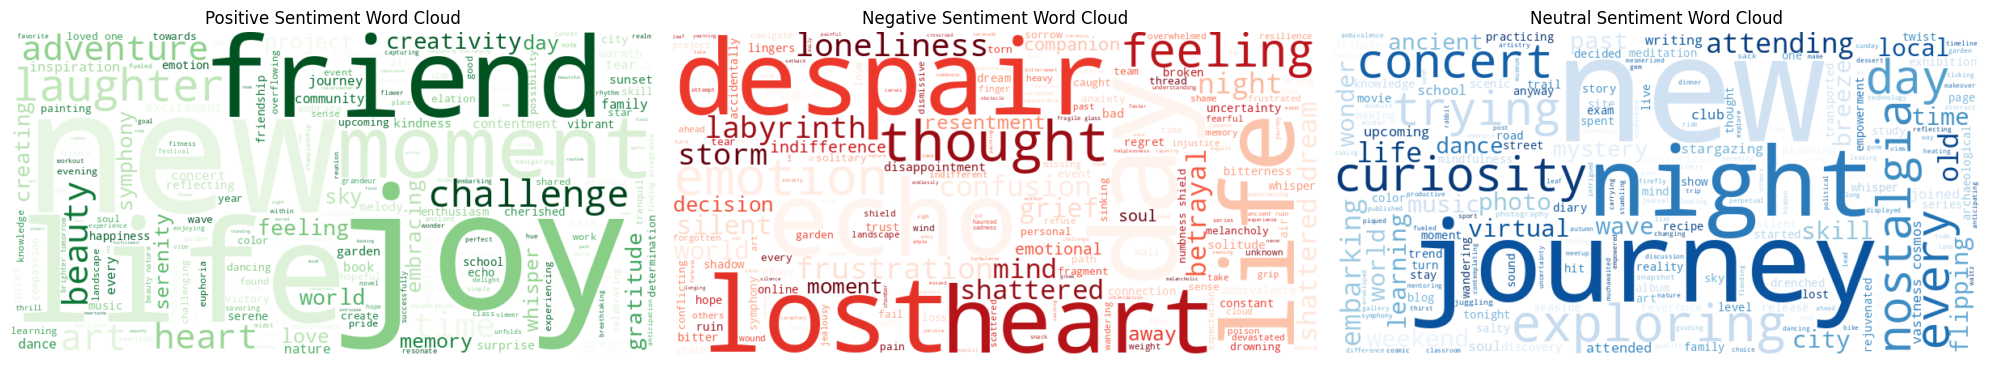

Word clouds for positive, negative, and neutral sentiments have been generated and displayed.


In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter text data by sentiment
positive_text = ' '.join(df[df['Predicted_Sentiment'] == 'Positive']['Processed_Text'])
negative_text = ' '.join(df[df['Predicted_Sentiment'] == 'Negative']['Processed_Text'])
neutral_text = ' '.join(df[df['Predicted_Sentiment'] == 'Neutral']['Processed_Text'])

# Generate Word Clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text)

# Plotting the Word Clouds
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Positive Sentiment Word Cloud')
axes[0].axis('off')

axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].set_title('Negative Sentiment Word Cloud')
axes[1].axis('off')

axes[2].imshow(wordcloud_neutral, interpolation='bilinear')
axes[2].set_title('Neutral Sentiment Word Cloud')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("Word clouds for positive, negative, and neutral sentiments have been generated and displayed.")


Provide a summary of the sentiment analysis findings, including insights from the sentiment distribution and word clouds.
